In [2]:
import pandas as pd
import numpy as np

from tkinter import filedialog as fd
from tkinter import Tk, BOTH

from datetime import datetime
from datetime import timedelta

from scipy import stats
from sympy import *

import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings("ignore")

from typing import Tuple

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" #print all out

## Задача 1. 
Дискретная случайная величина задана рядом распределения:


| 1 | 2 | 3 | 4 | 5 | 6 | 7 |
| --- | --- | --- | --- | --- | --- | --- | 
| 0.05 | 0.15 | 0.3 | 0.2 | 0.1 | 0.04 | 0.16

Построить многоугольник распределения и функцию распределения $F(x)$. Вычислить: $M[X],D[X],σ[X]$, а также коэффициент вариации, асимметрии, эксцесса, моду и медиану.

In [3]:
df = pd.DataFrame({'val':np.arange(1, 8),
                  'prob':np.array([0.05, 0.15, 0.3, 0.2, 0.1, 0.04, 0.16])})

In [4]:
df

,val,prob
0,1,0.0500
1,2,0.1500
2,3,0.3000
3,4,0.2000
4,5,0.1000
5,6,0.0400
6,7,0.1600


#### Многоугольник распределения

<Axes: xlabel='val'>

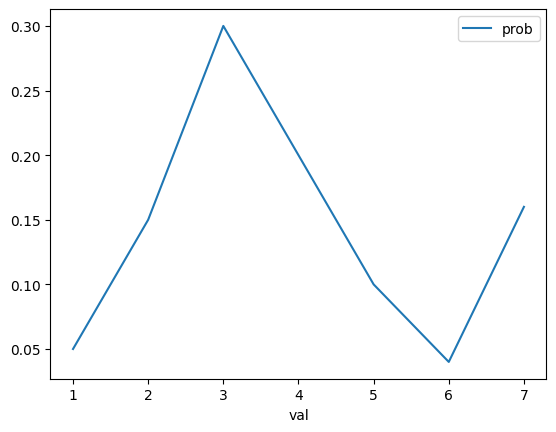

In [5]:
df.plot(x='val', y='prob')

#### Функция распределения F(x)

In [6]:
df['cumulative'] = np.cumsum(df['prob'])

df

,val,prob,cumulative
0,1,0.0500,0.0500
1,2,0.1500,0.2000
2,3,0.3000,0.5000
3,4,0.2000,0.7000
4,5,0.1000,0.8000
5,6,0.0400,0.8400
6,7,0.1600,1.0000


<Axes: xlabel='val', ylabel='Proportion'>

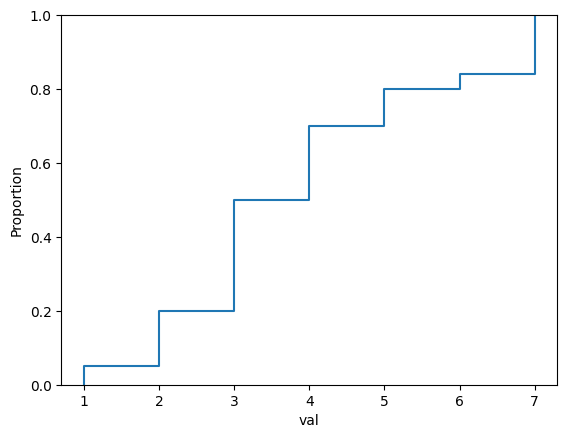

In [7]:
sns.ecdfplot(data=df,  x='val', weights='prob')

#### Подсчет базовых статистик

#### Пользовательские функции

In [8]:

def calc_variance(val:np.array, prob:np.array, mean:float) -> float:
    temp = ((val - mean)**2)*prob
    return temp.sum()

def calc_screw(val:np.array, prob:np.array, mean:float, std:float) -> float:
    temp = ((val - mean)**3)*prob
    screw = temp.sum()/std**3
    return screw

def calc_kurtosis(val:np.array, prob:np.array, mean:float, std:float) -> float:
    temp = ((val - mean)**4)*prob
    kurtosis = (temp.sum()/std**4) - 3
    return kurtosis

def calc_mode(val:np.array, prob:np.array) -> int:
    index = np.where(np.isclose(prob, prob.max()))[0][0]
    return val[index]

def calc_coef_var(mean:float, std:float) -> float:
    return std/mean*100

In [9]:
mean = np.average(df['val'], weights=df['prob'])

var = calc_variance(df['val'], df['prob'], mean)

std = np.sqrt(var) 

screw = calc_screw(df['val'], df['prob'], mean, std)

kurtosis = calc_kurtosis(df['val'], df['prob'], mean, std)

mode = calc_mode(df['val'], df['prob'])

median = np.median(df['val'])

coef_var = calc_coef_var(mean, std)

In [10]:
pd.DataFrame(data=[[mean, var, std, screw, kurtosis, mode, median, coef_var]], 
             columns=['mean',' var', 'std', 'screw', 'kurtosis', 'mode', 'median', 'coef_var'])

,mean,var,std,screw,kurtosis,mode,median,coef_var
0,3.9100,3.0419,1.7441,0.5112,-0.7004,3,4.0000,44.6062


#### Методы из пакета stats

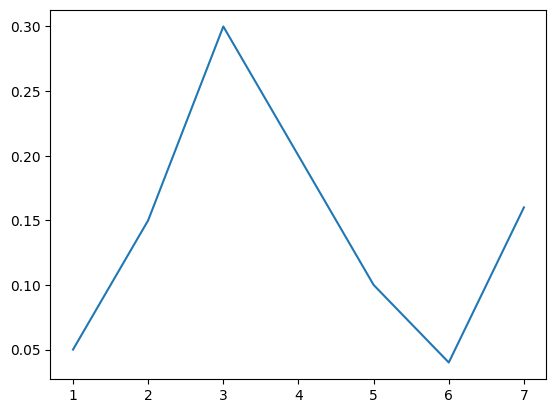

In [11]:
xk = df['val']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

In [12]:
mean = custm_dist.mean()

var = custm_dist.var()

std = custm_dist.std()


pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean',' var', 'std'])

,mean,var,std
0,3.9100,3.0419,1.7441


## Задача 2. 
Для случайной величины $Х$ с данным рядом распределения

| -1 | 0  | 1 | 8 |
| --- | --- | --- | --- |
| 0,2 | 0,1 | р1 | р2 |

А) найдите $р1$ и $р2$ так, чтобы $М(Х)=0,5$

Б) после этого вычислите математическое ожидание и дисперсию случайной величины $Х$ и постройте график ее функции распределения

#### Находим р1 и р2 так, чтобы М(Х)=0,5

In [13]:
mean = 0.5

p_1, p_2 = symbols('p_1 p_2')

df = pd.DataFrame({'val':np.array([-1, 0, 1, 8]),
                  'prob':np.array([0.2, 0.1, p_1, p_2])})

In [14]:
def find_miss_prob(val:np.array, prob:np.array, mean:float, *args) -> Tuple[float, float]:
    a = Eq((val * prob).sum(), mean)
    b = Eq(prob.sum(), 1)
    return linsolve((a, b), (args)).args[0]
    

In [15]:
p_1, p_2 = find_miss_prob(df['val'], df['prob'], 0.5, p_1, p_2)

In [16]:
df.loc[df['prob']==symbols('p_1'), 'prob'] = float(p_1)
df.loc[df['prob']==symbols('p_2'), 'prob'] = float(p_2)

In [17]:
df

,val,prob
0,-1,0.2000
1,0,0.1000
2,1,0.7000
3,8,0.0000


#### Вычисляем математическое ожидание и дисперсию случайной величины Х и строим график ее функции распределения

In [18]:
mean = np.average(df['val'], weights=df['prob'])

var = calc_variance(df['val'], df['prob'], mean)

In [19]:
pd.DataFrame(data=[[mean, var]], 
             columns=['mean',' var'])

,mean,var
0,0.5000,0.6500


In [20]:
df['cumulative'] = np.cumsum(df['prob'])
df

,val,prob,cumulative
0,-1,0.2000,0.2000
1,0,0.1000,0.3000
2,1,0.7000,1.0000
3,8,0.0000,1.0000


[Text(-1, 0, '-1'), Text(0, 0, '0'), Text(1, 0, '1'), Text(8, 0, '8')]

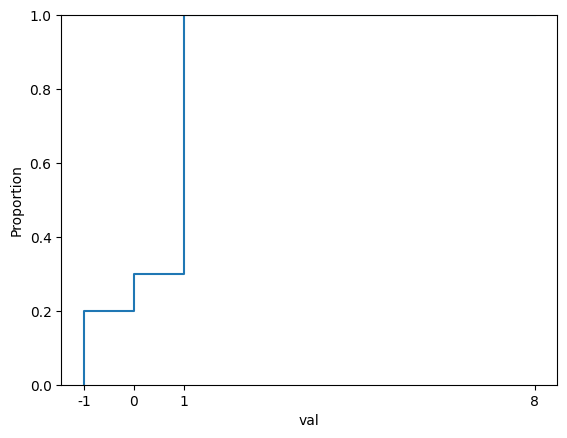

In [21]:
g = sns.ecdfplot(data=df,  x='val', weights='prob')
g.set_xticks(df['val']) 
g.set_xticklabels(df['val'])

## Задача 3
Задача. Дискретная СВ $X$ может принимать только два значения: $x_1$ и $x_2$, причем $x_1$ < $x_2$.
Известны вероятность $P$ возможного значения, математическое ожидание $M(x)$ и дисперсия $D(x)$. 

Найти: 
1) Закон распределения этой случайной величины; 

2) Функцию распределения СВ $X$; 

3) Построить график $F(x)$.

$P = 0,3; 
M(x) = 6,6; 
D(x) = 13,44.$ 

#### 1) Закон распределения этой случайной величины

In [22]:
mean = 6.6
var = 13.44
P = 0.3


x_1, x_2 = symbols('x_1 x_2')

df = pd.DataFrame({'val':np.array([x_1, x_2]),
                  'prob':np.array([P, 1-P])})

In [23]:
df

,val,prob
0,x_1,0.3000
1,x_2,0.7000


In [24]:
def calc_miss_val(val:np.array, prob:np.array, mean:float, var:float, *args) -> Tuple[float, float]:
    a = simplify(Eq((val * prob).sum(), mean))
    b = Eq((((df['val']-mean)**2)*df['prob']).sum(), var)
    return nonlinsolve((a, b), (args))

In [25]:
answer = calc_miss_val(df['val'], df['prob'], mean, var, x_1, x_2)

answer

{(1.0, 9.0), (12.2, 4.2)}

Условию $x_1$ < $x_2$ удовлетворяет только один ответ

In [26]:
x_1, x_2 = [float(x) for x in answer.args[0]]

In [27]:
df['val'] = [x_1, x_2]

In [28]:
df

,val,prob
0,1.0000,0.3000
1,9.0000,0.7000


<Axes: xlabel='val', ylabel='Proportion'>

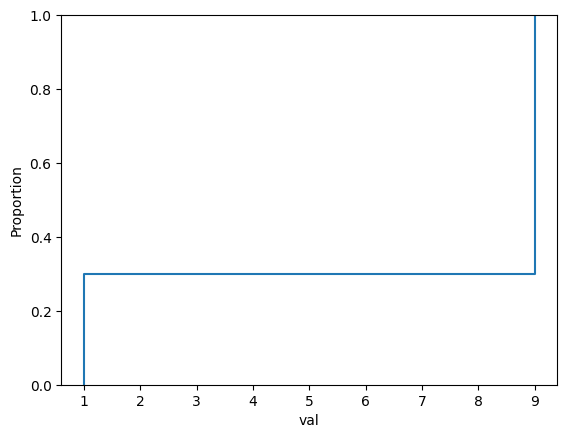

In [29]:
sns.ecdfplot(data=df,  x='val', weights='prob')

## Задача 4. 

Распределение дискретной случайной величины $Х$ задано следующей таблицей (рядом распределения):

| -6 | 3 | 9 | 15 |
| --- | --- | --- | --- |
| 0.40 | 0.30 | ? | 0.10 |

Определить недостающее значение в таблице распределения. Вычислить основные числовые характеристики распределения: $Mx,Dx,σx$. Найти и построить функцию распределения $F(x)$. Определить вероятность того, что случайная величина $Х$ примет значения:
- А) больше чем 6,
- Б) меньше чем 12,
- В) не больше 9.

In [30]:
x_1 = np.nan

df = pd.DataFrame({'val':[-6, 3, 9, 15], 'prob':[0.4, 0.3, np.nan, 0.1]})

In [31]:
x_1 = round(1 - df['prob'].sum(), 2)

df.loc[df['prob'].isna(), 'prob'] = x_1

Вычислить основные числовые характеристики распределения: $Mx,Dx,σx$.

In [32]:
mean = round(np.average(df['val'], weights=df['prob']), 2)

var = calc_variance(df['val'], df['prob'], mean)

std = round(np.sqrt(var), 2) 

pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean',' var', 'std'])

,mean,var,std
0,1.8000,52.5600,7.2500


Найти и построить функцию распределения $F(x)$

[Text(-6, 0, '-6'), Text(3, 0, '3'), Text(9, 0, '9'), Text(15, 0, '15')]

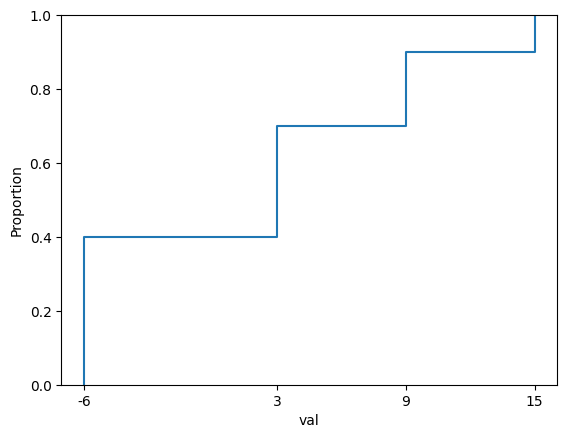

In [33]:
g = sns.ecdfplot(data=df,  x='val', weights='prob')
g.set_xticks(df['val']) 
g.set_xticklabels(df['val'])

In [34]:
df

,val,prob
0,-6,0.4000
1,3,0.3000
2,9,0.2000
3,15,0.1000


 Определить вероятность того, что случайная величина $Х$ примет значения:
- А) больше чем 6,
- Б) меньше чем 12,
- В) не больше 9.

#### Пользовательские функции

In [35]:
x_more_6 = round(df[df['val']>6]['prob'].sum(), 2)

x_less_12 = round(df[df['val']<12]['prob'].sum(), 2)

x_less_9_inc = round(df[df['val']<=9]['prob'].sum(), 2)

pd.DataFrame(data=[[x_more_6, x_less_12, x_less_9_inc]], 
             columns=['x_more_6','x_less_12', 'x_less_9_inc'])

,x_more_6,x_less_12,x_less_9_inc
0,0.3000,0.9000,0.9000


#### С пакетом stats

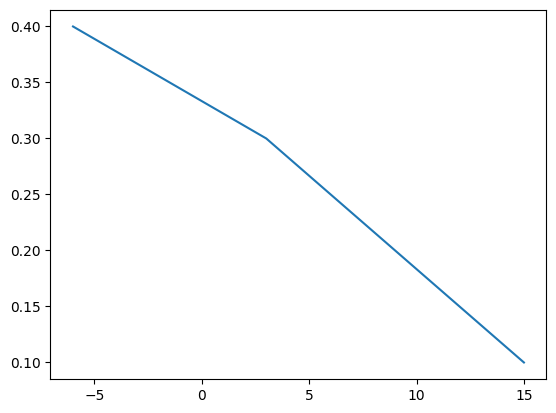

In [36]:
xk = df['val']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

In [37]:
x_more_6 = round(1-custm_dist.cdf(6), 2)
x_less_12 = round(custm_dist.cdf(12), 2)
x_less_9_inc = round(custm_dist.cdf(9), 2)

pd.DataFrame(data=[[x_more_6, x_less_12, x_less_9_inc]], 
             columns=['x_more_6','x_less_12', 'x_less_9_inc'])

,x_more_6,x_less_12,x_less_9_inc
0,0.3000,0.9000,0.9000


## Задача 5.

Задан закон распределения дискретной случайной величины $X$ (в первой строке указаны возможные значения $x_i$, во второй строке – вероятности возможных значений $p_i$).

Найти:
- А) математическое ожидание $M(X)$, дисперсию $D(X)$ и среднее квадратическое отклонение $σ(X)$;
- Б) составить функцию распределения случайной величины $F(x)$ и построить ее график;
- В) вычислить вероятности попадания случайной величины $X$ в интервал $x_2<X<x_4$, пользуясь составленной функцией распределения $F(x)$;
- Г) составить закон распределения величины $Y=100−2X$;
- Д) вычислить математическое ожидание и дисперсию составленной случайной величины $Y$ двумя способами, т.е. пользуясь свойством математического ожидания и дисперсии, а также непосредственно по закону распределения случайной величины $Y$.

| 10 | 20 | 30 | 40 | 50 |
| --- | --- | --- | --- | --- |
| 0.1 | 0.2 | 0.1 | 0.2 | 0.4 |

In [38]:
df = pd.DataFrame({'val':np.arange(10, 51, 10), 'prob':np.array([0.1, 0.2, 0.1, 0.2, 0.4])})

df

,val,prob
0,10,0.1000
1,20,0.2000
2,30,0.1000
3,40,0.2000
4,50,0.4000


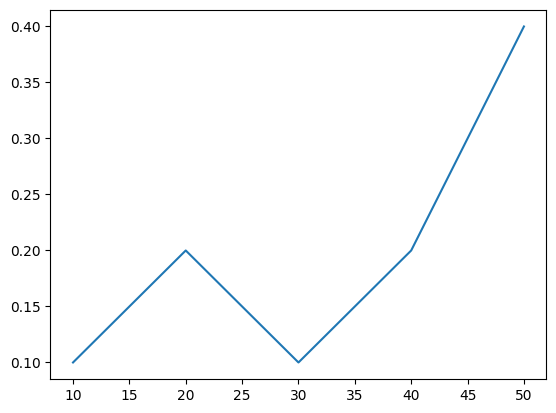

In [39]:
xk = df['val']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

- А) математическое ожидание $M(X)$, дисперсию $D(X)$ и среднее квадратическое отклонение $σ(X)$;

In [40]:
mean = custm_dist.mean()
var = custm_dist.var()
std = custm_dist.std()

pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean',' var', 'std'])

,mean,var,std
0,36.0000,204.0000,14.2829


- Б) составить функцию распределения случайной величины $F(x)$ и построить ее график;

<Axes: xlabel='val', ylabel='Proportion'>

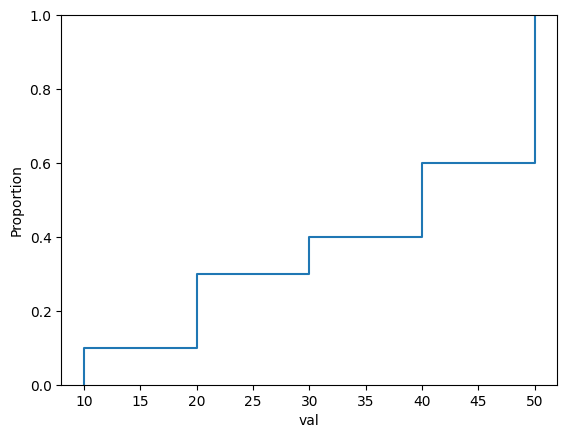

In [41]:
sns.ecdfplot(data=df,  x='val', weights='prob')

- В) вычислить вероятности попадания случайной величины $X$ в интервал $x_2<X<x_4$, пользуясь составленной функцией распределения $F(x)$;

In [42]:
round(custm_dist.cdf(39) - custm_dist.cdf(19), 2)

0.3

- Г) составить закон распределения величины $Y=100−2X$;

In [43]:
df['y_i'] = 100 - 2 * df['val']
df

,val,prob,y_i
0,10,0.1000,80
1,20,0.2000,60
2,30,0.1000,40
3,40,0.2000,20
4,50,0.4000,0


- Д) вычислить математическое ожидание и дисперсию составленной случайной величины  𝑌  двумя способами, т.е. пользуясь свойством математического ожидания и дисперсии, а также непосредственно по закону распределения случайной величины  𝑌 .

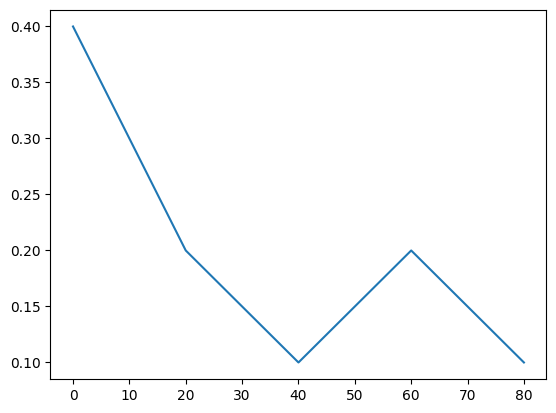

In [44]:
xk = df['y_i']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

In [45]:
mean = custm_dist.mean()
var = custm_dist.var()


pd.DataFrame(data=[[mean, var]], 
             columns=['mean',' var'])

,mean,var
0,28.0000,816.0000


## Задача 6.

Дискретная случайная величина задана таблице. Вычислить ее начальные и центральные моменты до 4 порядка включительно. Найти вероятности событий $ξ<Mξ, ξ≥Mξ, ξ<1/2Mξ, ξ≥1/2Mξ$.

| $X$ | 0 | 0.3 | 0.6 | 0.9 | 1.2 |
| --- | --- | --- | --- | --- | ---|
| $P$ | 0.2 | 0.4 | 0.2 | 0.1 | 0.1 |

In [46]:
df = pd.DataFrame({'val':np.arange(0, 1.3, .3), 'prob':np.array([0.2, 0.4, 0.2, 0.1, 0.1])})

df

,val,prob
0,0.0000,0.2000
1,0.3000,0.4000
2,0.6000,0.2000
3,0.9000,0.1000
4,1.2000,0.1000


#### Вычислить ее начальные и центральные моменты до 4 порядка включительно

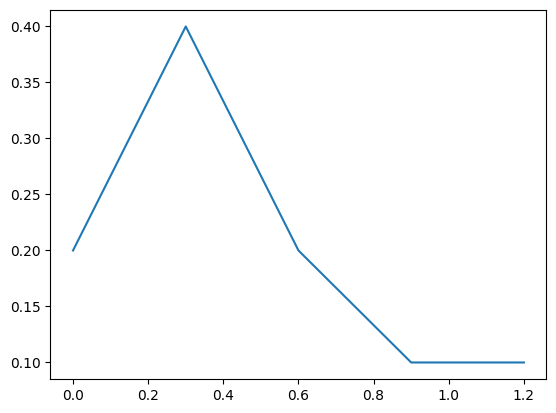

In [47]:
xk = df['val']
pk = df['prob']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, pk)

plt.show()

In [48]:
def calc_centr_momments(val, prob, moment):
    mean = (val*prob).sum()
    mom = ((val-mean)**moment)*prob
    return round(mom.sum(), 4)

In [49]:
non_centr_mom_1 = round(custm_dist.moment(1), 4)
non_centr_mom_2 = round(custm_dist.moment(2), 4)
non_centr_mom_3 = round(custm_dist.moment(3), 4)
non_centr_mom_4 = round(custm_dist.moment(4), 4)

centr_mom_1 = calc_centr_momments(df['val'], df['prob'], 1)
centr_mom_2 = calc_centr_momments(df['val'], df['prob'], 2)
centr_mom_3 = calc_centr_momments(df['val'], df['prob'], 3)
centr_mom_4 = calc_centr_momments(df['val'], df['prob'], 4)

pd.DataFrame(data=[[non_centr_mom_1, non_centr_mom_2, non_centr_mom_3, non_centr_mom_4, 
                    centr_mom_1, centr_mom_2, centr_mom_3, centr_mom_4]], 
             columns=['non_centr_mom_1', 'non_centr_mom_2', 'non_centr_mom_3', 'non_centr_mom_4',
                      'centr_mom_1', 'centr_mom_2', 'centr_mom_3', 'centr_mom_4'])


,non_centr_mom_1,non_centr_mom_2,non_centr_mom_3,non_centr_mom_4,centr_mom_1,centr_mom_2,centr_mom_3,centr_mom_4
0,0.4500,0.3330,0.2997,0.3021,0.0000,0.1305,0.0324,0.0442


#### Найти вероятности событий $ξ<Mξ, ξ≥Mξ, ξ<1/2Mξ, ξ≥1/2Mξ$.

In [50]:
mean = round(custm_dist.moment(1), 4)

round(custm_dist.cdf(mean), 4)

round(1 - custm_dist.cdf(mean), 4)

round(custm_dist.cdf(mean/2), 4)

round(1 - custm_dist.cdf(mean/2), 4)

0.6

0.4

0.2

0.8